# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Set up lists to hold data
city_weather = []

count = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:

    # Build query URL
    query_url = f"{url}appid={api_key}&units={units}&q="

   
    response = requests.get(query_url + city).json()
    city_weather.append(response)
       
    
# Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    count += 1
    
city_weather

[{'coord': {'lon': -28.7, 'lat': 38.52},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 66.48,
   'pressure': 1020.14,
   'humidity': 92,
   'temp_min': 66.48,
   'temp_max': 66.48,
   'sea_level': 1020.14,
   'grnd_level': 1020.04},
  'wind': {'speed': 16.24, 'deg': 242.93},
  'clouds': {'all': 80},
  'dt': 1559357105,
  'sys': {'message': 0.0063,
   'country': 'PT',
   'sunrise': 1559370766,
   'sunset': 1559423566},
  'timezone': 0,
  'id': 3372707,
  'name': 'Ribeira Grande',
  'cod': 200},
 {'coord': {'lon': -67.52, 'lat': -46.43},
  'weather': [{'id': 500,
    'main': 'Rain',
    'description': 'light rain',
    'icon': '10n'}],
  'base': 'stations',
  'main': {'temp': 42.54,
   'pressure': 1007.67,
   'humidity': 91,
   'temp_min': 42.54,
   'temp_max': 42.54,
   'sea_level': 1007.67,
   'grnd_level': 971.77},
  'wind': {'speed': 9.06, 'deg': 66.935},
  'rain': {'3h': 0.438},
  'cl

In [6]:
# Create Pandas table from city_weather responses
city_name = []
latitude = []
temperature = []
humidity = []
wind_speed = []
cloudiness = []


for x in city_weather:
    if x["cod"]==200:
        city_name.append(x["name"])
        latitude.append(x["coord"]["lat"])
        temperature.append(x["main"]["temp_max"])
        humidity.append(x["main"]["humidity"])
        wind_speed.append(x["wind"]["speed"])
        cloudiness.append(x["clouds"]["all"])

weather = {"City": city_name,
           "Latitude": latitude,
           "Temperature (°F)": temperature,
           "Humidity": humidity,
           "Wind Speed": wind_speed,
           "Cloudiness": cloudiness,}

weather_df = pd.DataFrame(weather)
weather_df = weather_df[["City","Latitude", "Temperature (°F)","Humidity","Wind Speed","Cloudiness"]]



weather_df.head()

,City,Latitude,Temperature (°F),Humidity,Wind Speed,Cloudiness
0,Ribeira Grande,38.52,66.48,92,16.24,80
1,Mar del Plata,-46.43,42.54,91,9.06,100
2,Timizart,36.80,64.50,67,9.82,0
3,Bereda,43.27,64.00,77,2.24,0
4,Arraial do Cabo,-22.97,76.20,81,1.90,17


In [7]:
weather_df.to_csv("weather_df.csv", index=False)

In [11]:
#Create X, Y for Lattitude vs. Temperature Plot
temperature_df = pd.DataFrame ({"Latitude": latitude, "Temperature": temperature})
temperature_df.head()

,Latitude,Temperature
0,38.52,66.48
1,-46.43,42.54
2,36.80,64.50
3,43.27,64.00
4,-22.97,76.20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

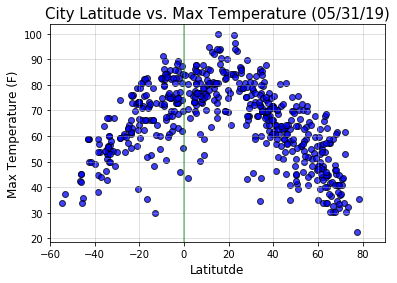

In [16]:
# Build Latitude vs. Temperature Scatter Plot
plt.scatter(x=temperature_df["Latitude"], 
            y=temperature_df["Temperature"], 
            marker="o",
            facecolors="blue", 
            edgecolors="black",
            alpha=0.75)

# Graph Properties
plt.title("City Latitude vs. Max Temperature (05/31/19)", fontsize=15)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitutde", fontsize=12)
plt.grid(alpha=0.5)
plt.axvline(x=0,c="g",alpha=0.5)
plt.xlim(-60,90)

# Save the image as .png
plt.savefig("Latitude_vs_Temperature.png")

# Show plot
plt.show()



In [15]:
#Create X, Y for Lattitude vs. Humidity Plot
humidity_df = pd.DataFrame ({"Latitude": latitude, "Humidity": humidity})
humidity_df.head()

,Latitude,Humidity
0,38.52,92
1,-46.43,91
2,36.80,67
3,43.27,77
4,-22.97,81


#### Latitude vs. Humidity Plot

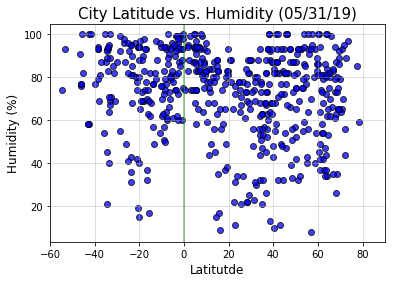

In [17]:
# Build Latitude vs. Humidity Scatter Plot
plt.scatter(x=humidity_df["Latitude"], 
            y=humidity_df["Humidity"], 
            marker="o",
            facecolors="blue", 
            edgecolors="black",
            alpha=0.75)

# Graph Properties
plt.title("City Latitude vs. Humidity (05/31/19)", fontsize=15)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitutde", fontsize=12)
plt.grid(alpha=0.5)
plt.axvline(x=0,c="g",alpha=0.5)
plt.xlim(-60,90)

# Save the image as .png
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()



In [20]:
#Create X, Y for Lattitude vs. Cloudiness Plot
cloudiness_df = pd.DataFrame ({"Latitude": latitude, "Cloudiness": cloudiness})
cloudiness_df.head()

,Latitude,Cloudiness
0,38.52,80
1,-46.43,100
2,36.80,0
3,43.27,0
4,-22.97,17


#### Latitude vs. Cloudiness Plot

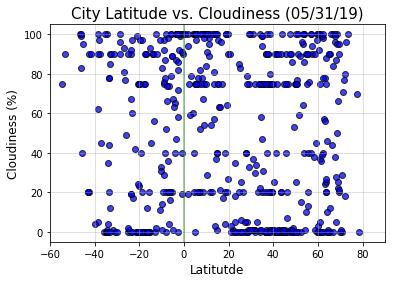

In [26]:
# Build Latitude vs. Cloudiness Scatter Plot
plt.scatter(x=cloudiness_df["Latitude"], 
            y=cloudiness_df["Cloudiness"], 
            marker="o",
            facecolors="blue", 
            edgecolors="black",
            alpha=0.75)

# Graph Properties
plt.title("City Latitude vs. Cloudiness (05/31/19)", fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitutde", fontsize=12)
plt.grid(alpha=0.5)
plt.axvline(x=0,c="g",alpha=0.5)
plt.xlim(-60,90)

# Save the image as .png
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()


In [23]:
#Create X, Y for Lattitude vs. Wind Speed Plot
wind_speed_df = pd.DataFrame ({"Latitude": latitude, "Wind_Speed": wind_speed})
wind_speed_df.head()

,Latitude,Wind_Speed
0,38.52,16.24
1,-46.43,9.06
2,36.80,9.82
3,43.27,2.24
4,-22.97,1.90


#### Latitude vs. Wind Speed Plot

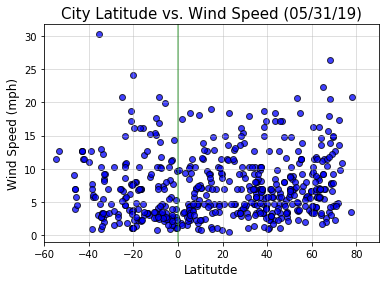

In [25]:
# Build Latitude vs. Wind Speed Scatter Plot
plt.scatter(x=wind_speed_df["Latitude"], 
            y=wind_speed_df["Wind_Speed"], 
            marker="o",
            facecolors="blue", 
            edgecolors="black",
            alpha=0.75)

# Graph Properties
plt.title("City Latitude vs. Wind Speed (05/31/19)", fontsize=15)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitutde", fontsize=12)
plt.grid(alpha=0.5)
plt.axvline(x=0,c="g",alpha=0.5)
plt.xlim(-60,90)

# Save the image as .png
plt.savefig("Latitude_vs_WindSpeed.png")

# Show plot
plt.show()


Three observations:

1. Based on the data from the "Latitude vs. Temperature" plot, the climate is warmer on and around the equator. The pattern indicates the climate gets cooler as you move further away from the equator.
2. The data from the "Latitude vs. Humidity" plot also tells us that all the cities in the sample around the equator have high Humidity levels. The humidity varies quite widely as you move further away from the equator, but not all the cities away from the equator are grouped together like those around the equator.
3. There are no visible patterns on the data from the "Latitude vs. Cloudiness" and "Latitude vs. Wind Speed" plots that tell us difinitevly if these elements are more common near or away the equator. There's no getting around the clouds or wind.